In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

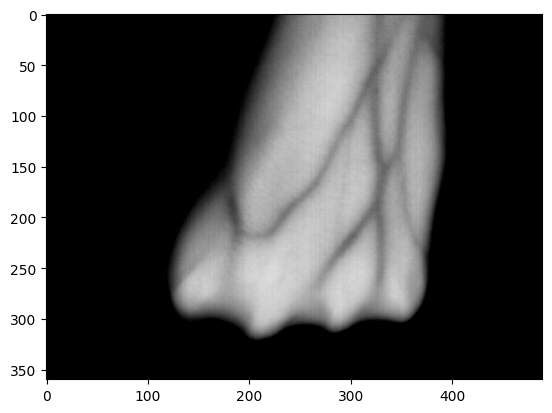

In [ ]:
img = cv2.imread('/content/v.png')
plt.imshow(img)

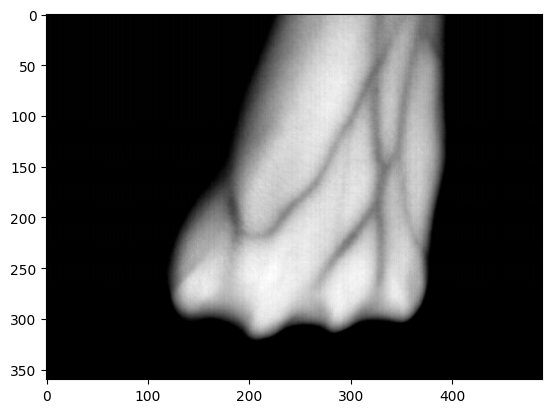

In [ ]:
greysc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(greysc,cmap='gray')

In [ ]:
#threshold

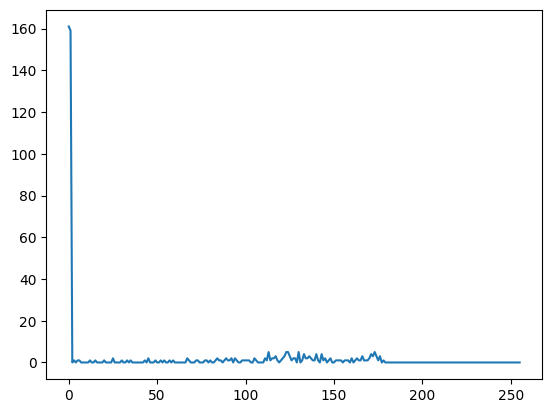

In [ ]:
histr = cv2.calcHist(greysc,[0],None,[256],[0,256])
plt.plot(histr)

In [ ]:
# Adaptive Thresholding

In [ ]:
Gaussian = cv2.GaussianBlur(greysc, (13, 13), 10)

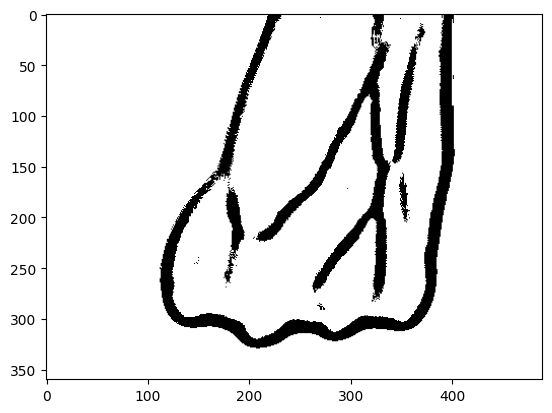

In [ ]:
th2 = cv2.adaptiveThreshold(Gaussian,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(th2,cmap='gray')

In [ ]:
#watershed

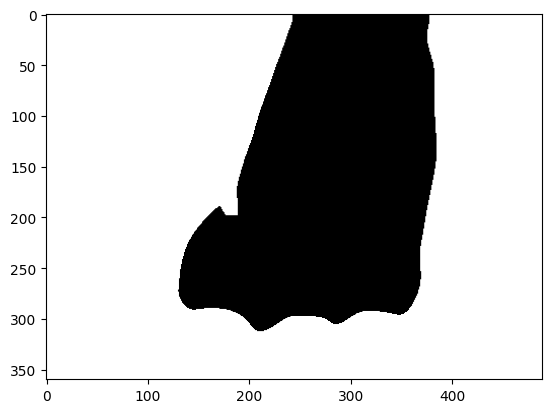

In [ ]:
ret, thresh = cv2.threshold(Gaussian,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(sure_bg,cmap='gray')

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

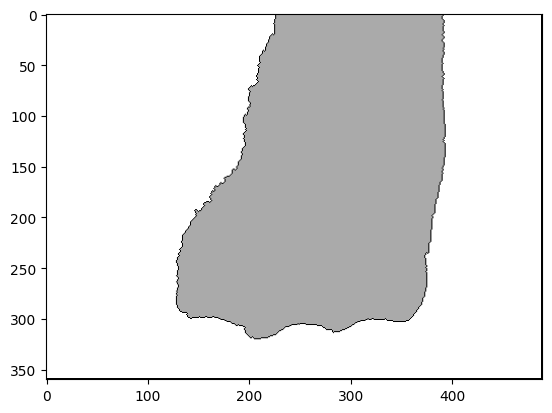

In [ ]:
plt.imshow(markers,cmap='gray')

In [ ]:
#Morphological Transform

In [ ]:
cirkernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
reckernel = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
crosskernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

In [ ]:
img_erosion = cv2.erode(greysc, cirkernel, iterations=1,)
img_dilation = cv2.dilate(greysc, cirkernel, iterations=1)

In [ ]:
# Circular structuring element

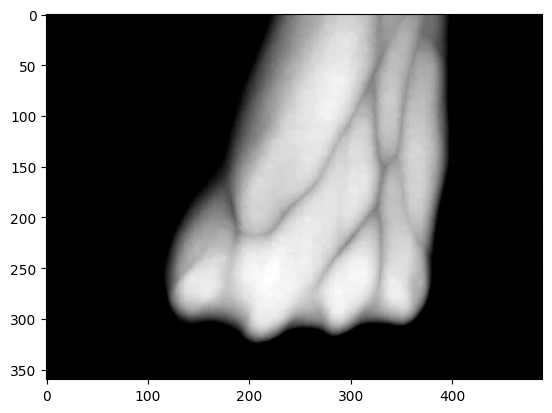

In [ ]:
plt.imshow(img_dilation,cmap='gray')

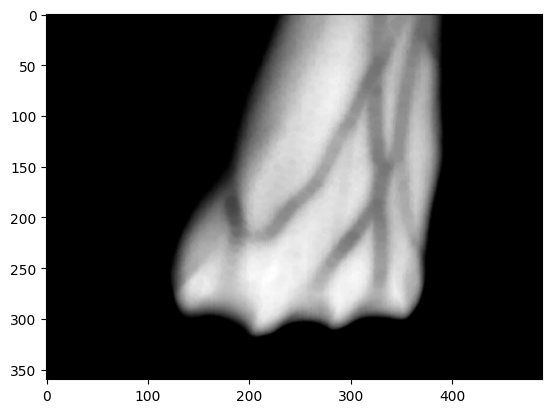

In [ ]:
plt.imshow(img_erosion,cmap='gray')

In [ ]:
#Square structuring element

In [ ]:
img_erosion = cv2.erode(greysc, reckernel, iterations=1,)
img_dilation = cv2.dilate(greysc, reckernel, iterations=1)

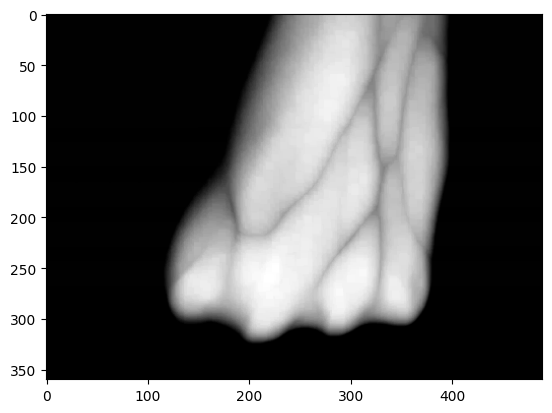

In [ ]:
plt.imshow(img_dilation,cmap='gray')

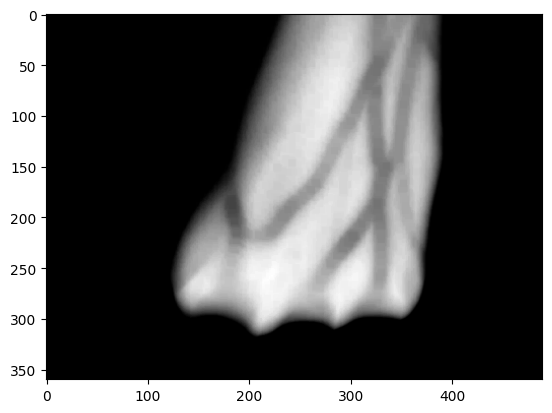

In [ ]:
plt.imshow(img_erosion,cmap='gray')

In [ ]:
# Cross shaped structuring element

In [ ]:
opening = cv2.morphologyEx(greysc, cv2.MORPH_OPEN, crosskernel)
closing = cv2.morphologyEx(greysc, cv2.MORPH_CLOSE, crosskernel)

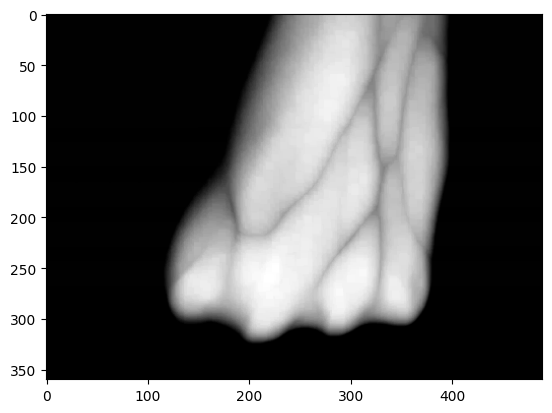

In [ ]:
plt.imshow(img_dilation,cmap='gray')

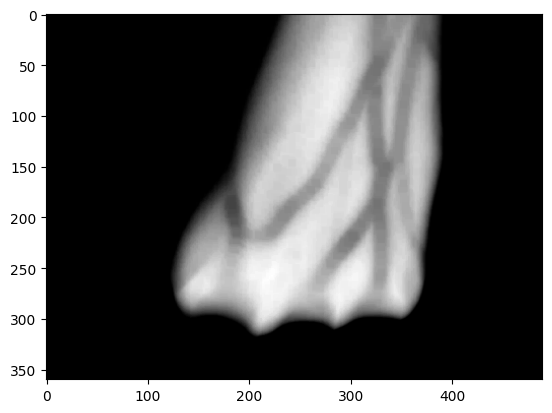

In [ ]:
plt.imshow(img_erosion,cmap='gray')

In [ ]:
#Mask of Veins

In [ ]:
mask = ~sure_bg

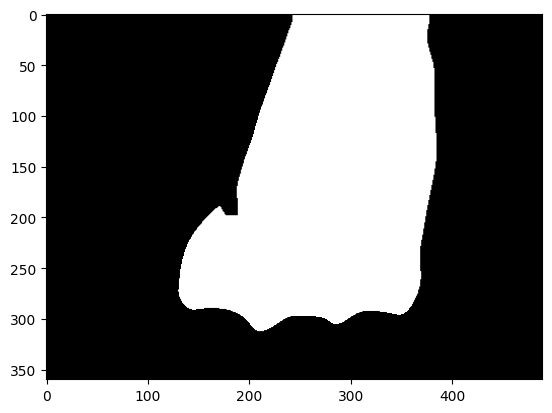

In [ ]:
plt.imshow(mask,cmap='gray')

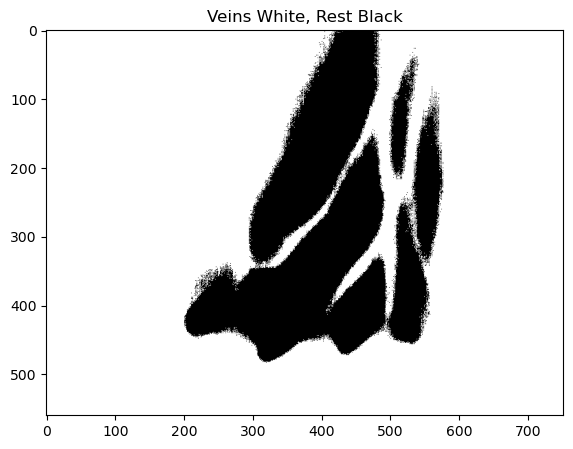

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale wrist image
image = cv2.imread('/home/snucse/Desktop/Vein.png', cv2.IMREAD_GRAYSCALE)

# Thresholding to make veins white and rest black
_, thresholded_image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

# Inverting the thresholded image to make veins white
inverted_image = cv2.bitwise_not(thresholded_image)

# Display the original and inverted images
plt.figure(figsize=(10, 5))

plt.imshow(inverted_image, cmap='gray')
plt.title('Veins White, Rest Black')

plt.show()


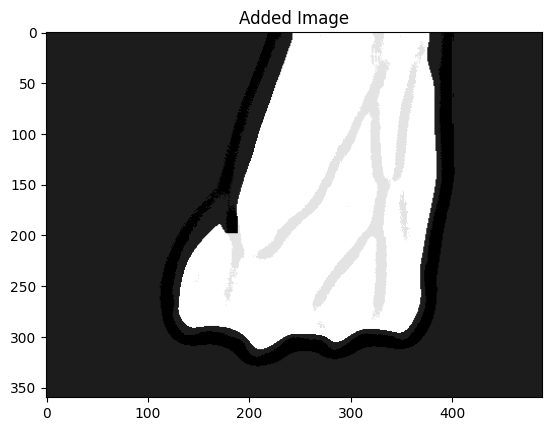

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming inverted_image and mask are loaded grayscale images

# Define the weights for blending the images
alpha = 0.1  # Weight for inverted_image
beta = 0.8  # Weight for mask

# Blend the two images
added_image = cv2.addWeighted(th2, alpha, mask, beta, 0)

# Display the added image
plt.imshow(added_image, cmap='gray')
plt.title('Added Image')
plt.show()


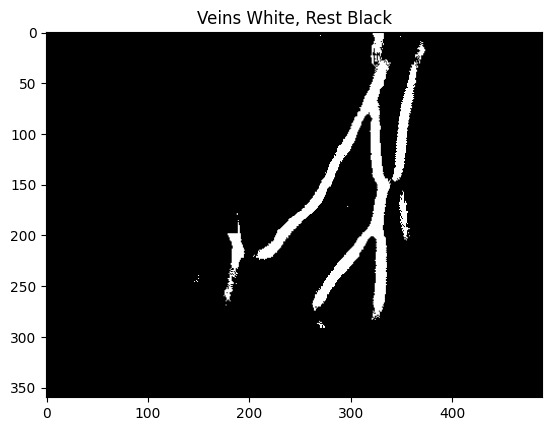

In [ ]:
import cv2
import numpy as np

# Read the imag

# Define the lower and upper thresholds
lower_threshold = 200
upper_threshold = 210

# Create a binary mask for pixels within the specified range
binary_mask = cv2.inRange(added_image, lower_threshold, upper_threshold)


plt.imshow(binary_mask, cmap='gray')
plt.title('Veins White, Rest Black')

plt.show()

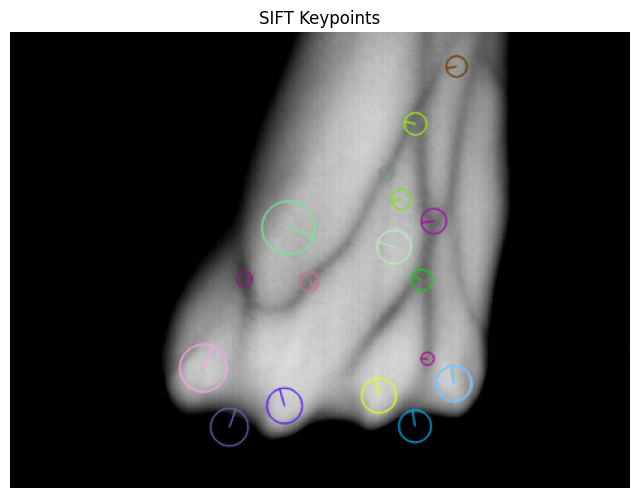

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/v.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(gray_image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Visualize the image with keypoints
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()


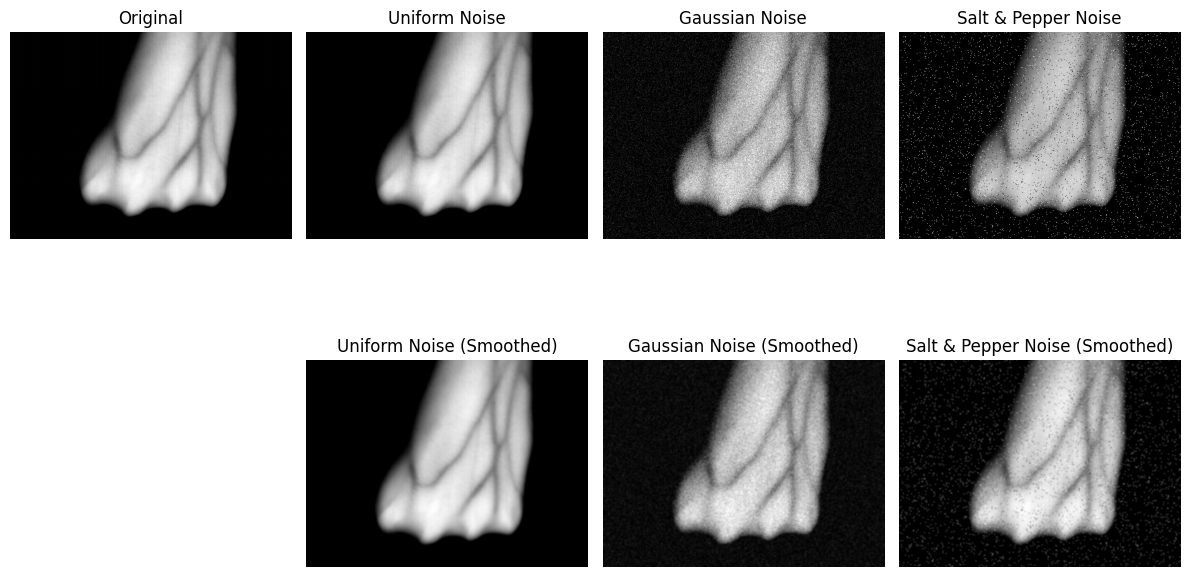

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load input image
input_image = cv2.imread('/content/v.png', cv2.IMREAD_GRAYSCALE)

# Function to add uniform noise to an image
def add_uniform_noise(image, scale=0.1):
    noise = np.random.uniform(-scale, scale, size=image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, std_dev=25):
    noise = np.random.normal(mean, std_dev, size=image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Function to add salt and pepper noise to an image
def add_salt_and_pepper_noise(image, amount=0.02):
    noisy_image = np.copy(image)
    salt_pixels = np.random.choice([True, False], size=image.shape, p=[amount, 1 - amount])
    pepper_pixels = np.random.choice([True, False], size=image.shape, p=[amount, 1 - amount])
    noisy_image[salt_pixels] = 255
    noisy_image[pepper_pixels] = 0
    return noisy_image

# Apply smoothing filters to reduce noise
def apply_smoothing(image, filter_type='gaussian'):
    if filter_type == 'gaussian':
        return cv2.GaussianBlur(image, (5, 5), 0)
    elif filter_type == 'median':
        return cv2.medianBlur(image, 5)
    elif filter_type == 'bilateral':
        return cv2.bilateralFilter(image, 9, 75, 75)

# Generate noisy images
uniform_noisy_image = add_uniform_noise(input_image)
gaussian_noisy_image = add_gaussian_noise(input_image)
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(input_image)

# Apply smoothing filters to noisy images
uniform_smoothed_image = apply_smoothing(uniform_noisy_image)
gaussian_smoothed_image = apply_smoothing(gaussian_noisy_image)
salt_and_pepper_smoothed_image = apply_smoothing(salt_and_pepper_noisy_image)

# Visualize images
plt.figure(figsize=(12, 10))

plt.subplot(3, 4, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(uniform_noisy_image, cmap='gray')
plt.title('Uniform Noise')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(salt_and_pepper_noisy_image, cmap='gray')
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(uniform_smoothed_image, cmap='gray')
plt.title('Uniform Noise (Smoothed)')
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(gaussian_smoothed_image, cmap='gray')
plt.title('Gaussian Noise (Smoothed)')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(salt_and_pepper_smoothed_image, cmap='gray')
plt.title('Salt & Pepper Noise (Smoothed)')
plt.axis('off')

plt.tight_layout()
plt.show()



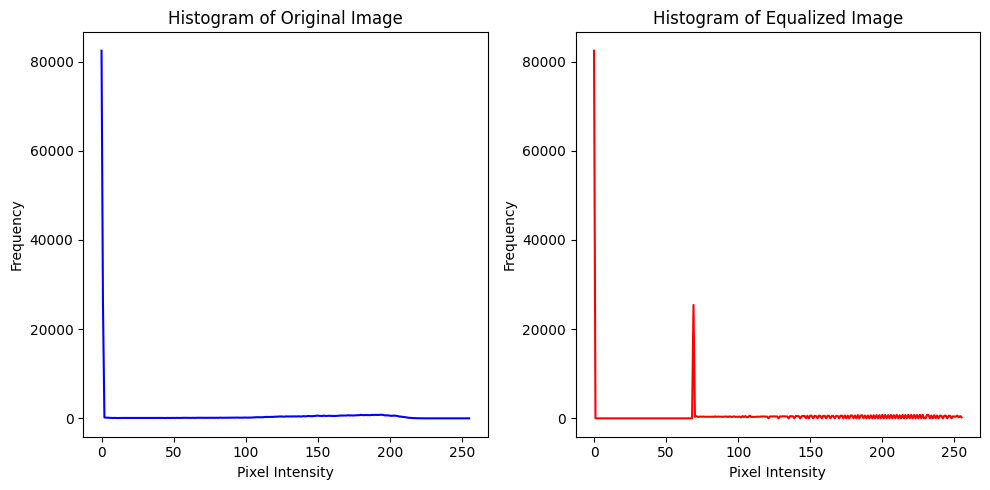

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/v.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Generate histogram of the original and equalized images
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(hist_original, color='blue')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(hist_equalized, color='red')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


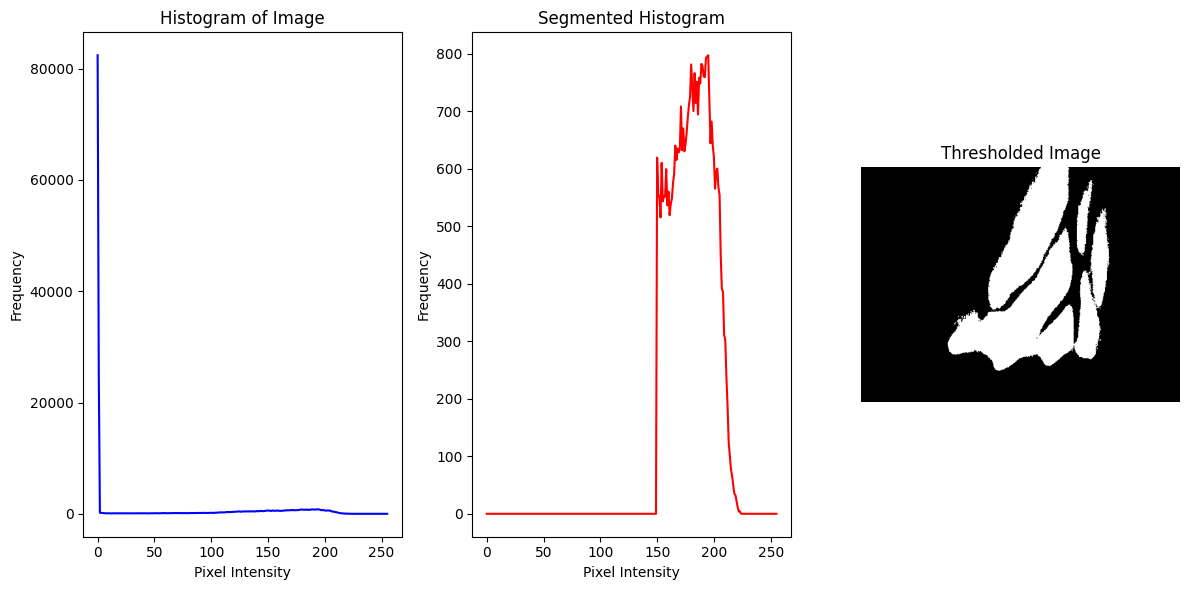

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/v.png', cv2.IMREAD_GRAYSCALE)

# Compute histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Threshold value (adjust as needed)
threshold_value = 150

# Threshold the histogram
segmented_histogram = np.zeros_like(histogram)
segmented_histogram[threshold_value:] = histogram[threshold_value:]

# Apply threshold to the original image
binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)[1]

# Plot histogram and segmented histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(histogram, color='blue')
plt.title('Histogram of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.plot(segmented_histogram, color='red')
plt.title('Segmented Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()


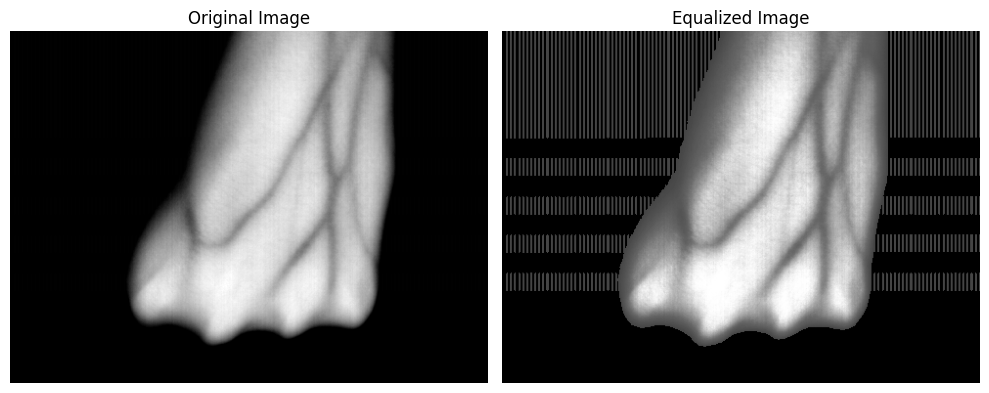

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/v.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Visualize the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()


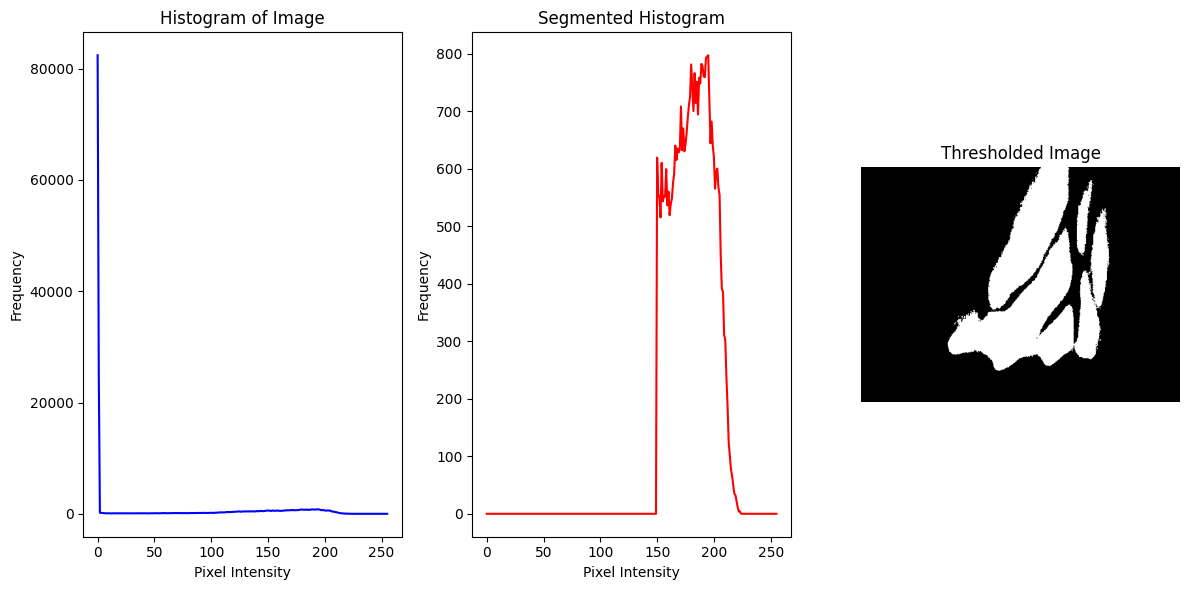

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/v.png', cv2.IMREAD_GRAYSCALE)

# Compute histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Define threshold value
threshold_value = 150

# Segment the histogram
segmented_histogram = np.zeros_like(histogram)
segmented_histogram[threshold_value:] = histogram[threshold_value:]

# Apply threshold to the original image
binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)[1]

# Plot histogram and segmented histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(histogram, color='blue')
plt.title('Histogram of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.plot(segmented_histogram, color='red')
plt.title('Segmented Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()


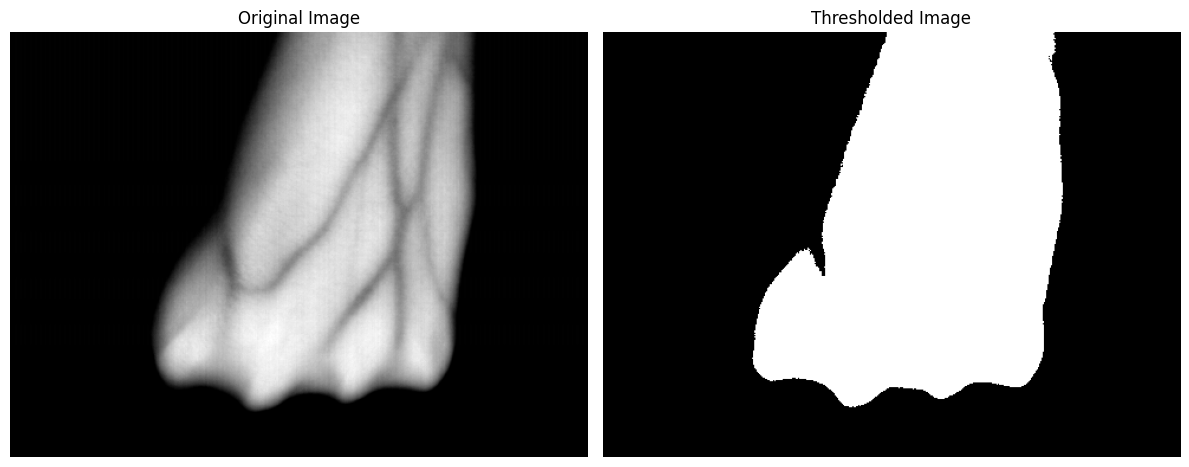

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/v.png', cv2.IMREAD_GRAYSCALE)

# Calculate histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Choose threshold using Otsu's method
_, thresholded_image = cv2.threshold(image, 50, 200, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plot original image and thresholded image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()
